### Athens University of Economics and Business
### Department of Management Science & Technology
### Msc in Business Analytics

### Course : Machine Learning & Content Analytics
* ### Instructors : H.Papageorgiou, G.Perakis
* ### Students : Xheni Cobanaj (f2822117), Nikolaos Mantzakos (f2822107), Dimitris Papageorgiou (f2822109)

* Import of necessary libraries :

In [1]:
#pip install wordcloud

In [2]:
#pip install tensorflow

In [3]:
# importing all necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [4]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jennycobanaj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jennycobanaj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jennycobanaj/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennycobanaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/MyDrive/mbti_1.csv"

# EDA

In [7]:
# df = pd.read_csv("/content/drive/MyDrive/mbti_1.csv",header=0)
# print("Columns present in the data: ",[i for i in df.columns])
# print("Number of data points: ",df.shape[0])
# df.head()

In [8]:
df = pd.read_csv("mbti_1.csv",header=0)
print("Columns present in the data: ",[i for i in df.columns])
print("Number of data points: ",df.shape[0])
df.head()

Columns present in the data:  ['type', 'posts']
Number of data points:  8675


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...



* ### Information about the data :

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [10]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [11]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

* Number of Personality types in the data barplot



/Users/jennycobanaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


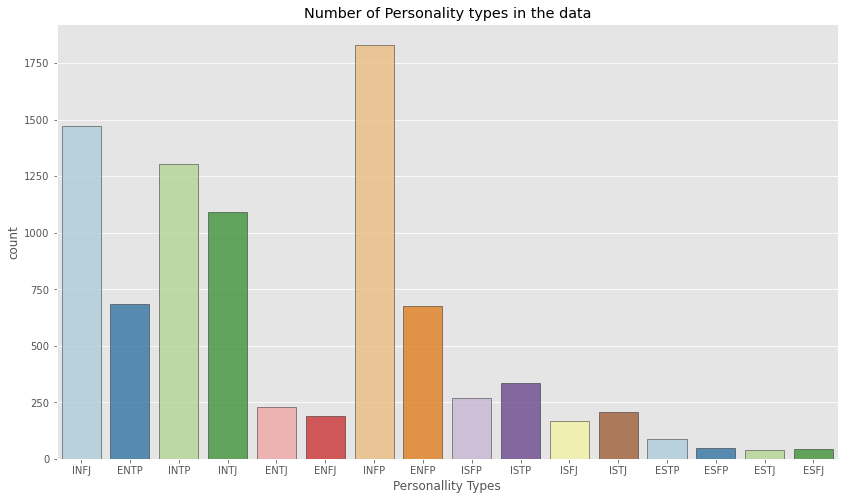

In [12]:
plt.figure(figsize=(14,8))
#sns.set_style("darkgrid")
plt.style.use('ggplot')
sns.countplot(df.type,palette="Paired",edgecolor='black',alpha=0.8)
plt.xlabel('Personallity Types')
plt.title('Number of Personality types in the data')
plt.show()

* Number of posts per personality type

In [13]:
total=(df.groupby(['type']).count()*50).sort_values("posts",ascending=False)
print("Number of posts based on Personality Type is:")
total

Number of posts based on Personality Type is:


,posts
type,
INFP,91600
INFJ,73500
INTP,65200
INTJ,54550
ENTP,34250
ENFP,33750
ISTP,16850
ISFP,13550
ENTJ,11550


* Number of posts for each personality type

Text(0.5, 1.0, 'Number of posts for each personality type')

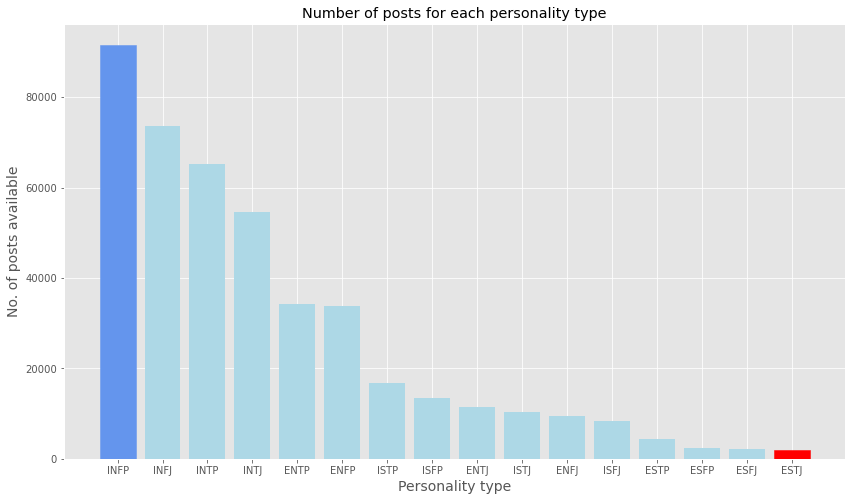

In [14]:
plt.figure(figsize=(14,8))
# sns.set_style("darkgrid")
# sns.set_context("notebook")
plt.style.use('ggplot')
plot = plt.bar(np.array(total.index), height = total['posts'],color='lightblue')
plot[0].set_color('cornflowerblue')
plot[-1].set_color('r')
plt.xlabel('Personality type', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Number of posts for each personality type')

### Example of a post from a single user in the forum :

In [15]:
print(df.loc[2]["posts"])

'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3 

In [16]:
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(10)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263)]

In [17]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

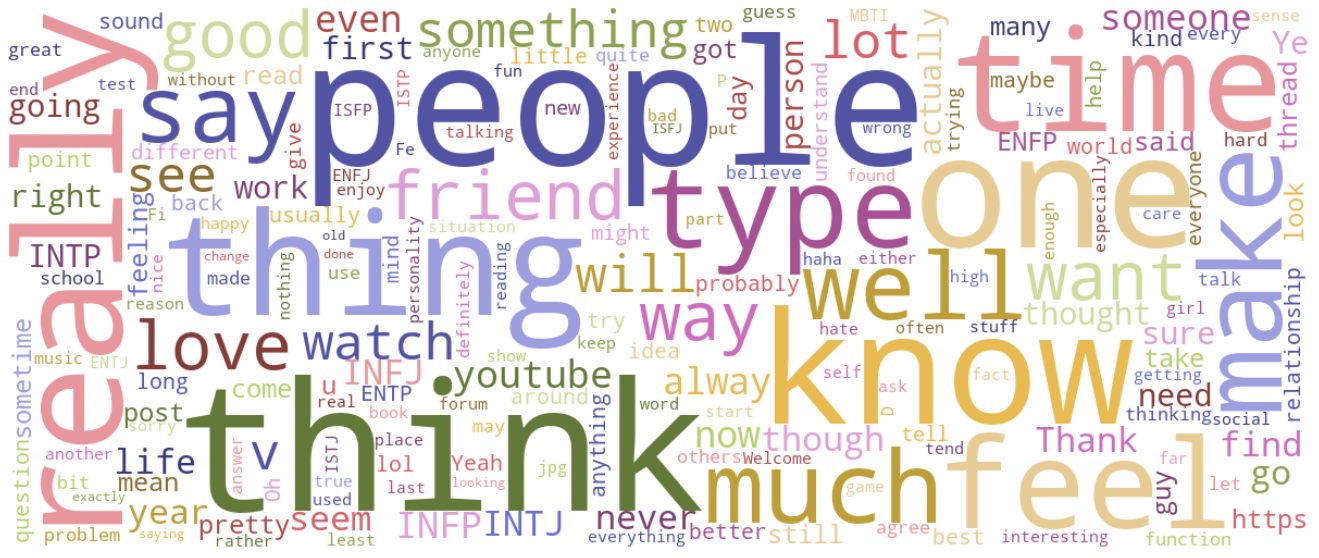

In [18]:
#Plotting the most common words with WordCloud.
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Most used words for each of the 16 personality types

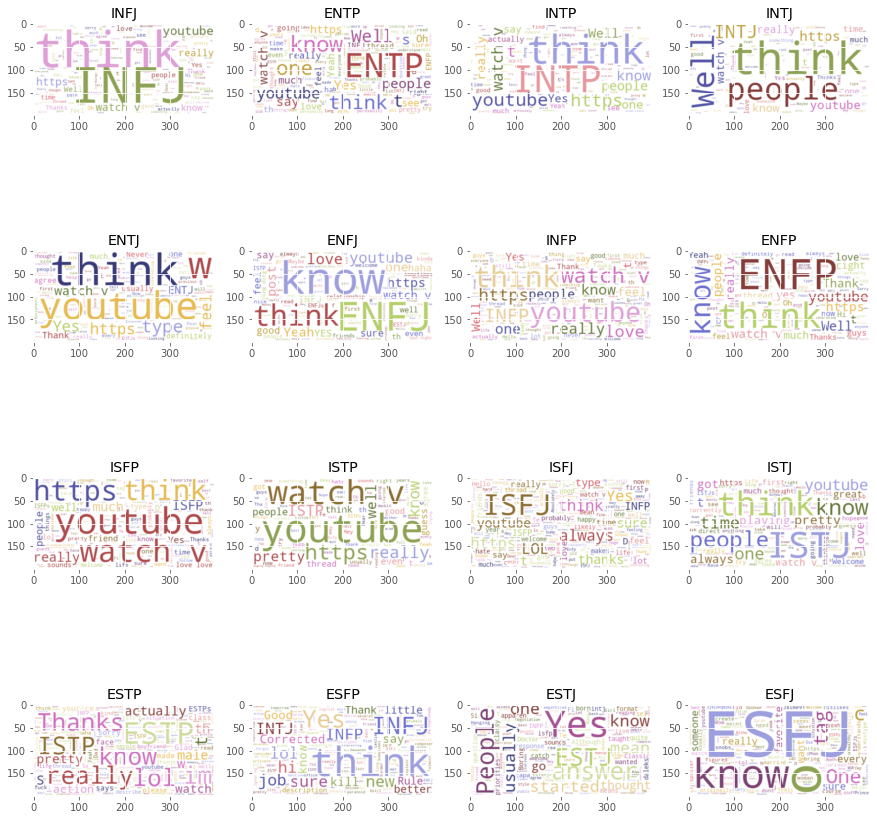

In [19]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_2 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False,background_color="white",colormap="tab20b").generate(df_2['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [20]:
data = df.copy()

# Function for making the four target features.



* Converting the task from multiclass to multilabel

In [21]:
# function for producing the four binary target variables
def categories(df):
  df['Extraversion'] = ''
  df['Sensing'] = ''
  df['Thinking'] = ''
  df['Judging'] = ''

  for i in df.index:    
    if "E" in df['type'][i]:
      df['Extraversion'][i] = 1
    else:
      df['Extraversion'][i] = 0

    if "S" in df['type'][i]:
      df['Sensing'][i] = 1
    else:
      df['Sensing'][i] = 0
    
    if "T" in df['type'][i]:
      df['Thinking'][i] = 1
    else:
      df['Thinking'][i] = 0
    
    if "J" in df['type'][i]:
      df['Judging'][i] = 1
    else:
      df['Judging'][i] = 0
  return(df)

* Spliting each personality to the four labels

In [22]:
categories(data)

,type,posts,Extraversion,Sensing,Thinking,Judging
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,1,1
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,0,1,0,0
8671,ENFP,'So...if this thread already exists someplace ...,1,0,0,0
8672,INTP,'So many questions when i do these things. I ...,0,0,1,0
8673,INFP,'I am very conflicted right now when it comes ...,0,0,0,0


* Targets proportions in the data set

In [23]:
# targets proportions in the data set
print(round(data.Extraversion.value_counts()/len(data),2))
print(round(data.Sensing.value_counts()/len(data),2))
print(round(data.Thinking.value_counts()/len(data),2))
print(round(data.Judging.value_counts()/len(data),2))

0    0.77
1    0.23
Name: Extraversion, dtype: float64
0    0.86
1    0.14
Name: Sensing, dtype: float64
0    0.54
1    0.46
Name: Thinking, dtype: float64
0    0.6
1    0.4
Name: Judging, dtype: float64


In [24]:
print ("Introversion (I) / Extraversion (E):\t",round((data['Extraversion'].value_counts()[0]/len(data))*100),'%', " / ", round((data['Extraversion'].value_counts()[1]/len(data))*100),'%')
print ("Intuition (N) / Sensing (S):\t", round((data['Sensing'].value_counts()[0]/len(data))*100),'%', " / ", round((data['Sensing'].value_counts()[1]/len(data))*100),'%')
print ("Feeling (F) /Thinking (T) :\t", round((data['Thinking'].value_counts()[0]/len(data))*100),'%', " / ", round((data['Thinking'].value_counts()[1]/len(data))*100),'%')
print ("Perceiving (P) /Judging (J) :\t", round((data['Judging'].value_counts()[0]/len(data))*100),'%', " / ",round((data['Judging'].value_counts()[1]/len(data))*100),'%')


Introversion (I) / Extraversion (E):	 77 %  /  23 %
Intuition (N) / Sensing (S):	 86 %  /  14 %
Feeling (F) /Thinking (T) :	 54 %  /  46 %
Perceiving (P) /Judging (J) :	 60 %  /  40 %


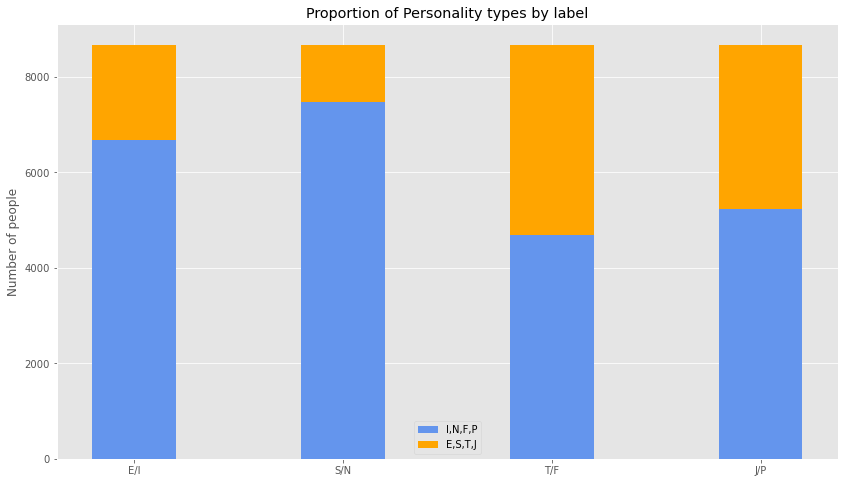

In [25]:
N = 4
plt.figure(figsize=(14,8))
# sns.set_style("darkgrid")
# sns.set_context("notebook")
plt.style.use('ggplot')

top = (data['Extraversion'].value_counts()[1], data['Sensing'].value_counts()[1], data['Thinking'].value_counts()[1], data['Judging'].value_counts()[1])
bott = (data['Extraversion'].value_counts()[0], data['Sensing'].value_counts()[0], data['Thinking'].value_counts()[0], data['Judging'].value_counts()[0])

ind = np.arange(N)    # the x locations for the groups
width = 0.4      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, bott, width, color='cornflowerblue',label="I,N,F,P")
p2 = plt.bar(ind, top, width, bottom=bott, color='orange',label="E,S,T,J")

plt.ylabel('Number of people')
plt.title('Proportion of Personality types by label')
plt.xticks(ind, ('E/I',  'S/N', 'T/F', 'J/P'))
plt.legend()
plt.show()

# Text Preprocessing and Data Manipulation

* Cleaning function to be applied to the posts.

In [26]:
def text_cleaning(text):
  
  # make all characters lowercase
  text = text.lower()

  # removing the posts delimiter with double space to separate words  
  text = text.replace("|"," ") 

  # removing the urls
  text = re.sub(r'https?:\/\/.*?[\s+]', '',text)

  # removing Punctuation
  text = re.sub('[%s]*' % string.punctuation, '',text)

  # removing numbers
  text = re.sub('[0-9]+','', text)
   
  # removing non-words 
  text = re.sub(r'[^a-zA-Z\s]','',text)

  # removing the personallity type codes 
  pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
  pers_types = [p.lower() for p in pers_types]
  
  for t in pers_types:
      text = text.replace(t,"")


  # removing big spaces
  text = re.sub(' +', ' ', text) 

  

  return(text)  

* Application and Example of cleaned text

In [27]:
data['posts'] = data['posts'].apply(text_cleaning)
data.posts[0]

' and moments sportscenter not top ten plays pranks what has been the most lifechanging experience in your life on repeat for most of today may the perc experience immerse you the last thing my friend posted on his facebook before committing suicide the next day rest in peace hello sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items youve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims is indeed a video game and a good one at that note a good one at that is somewhat subjectiv

### Making our custom stop words vocabulary 

In this next section we are going to make a custom stop words vocabulary. Firstly, we will join all records from column posts into the "corpora" variable. Next using the counter function we are going to find the frequency of each unique word in the dataset and subsequently, the 100 most frequent of them, are going to form the custom vocabulary, in the variable "stop_words"

In [28]:
corpora = " ".join(data.posts)
print(corpora[:1000])

 and moments sportscenter not top ten plays pranks what has been the most lifechanging experience in your life on repeat for most of today may the perc experience immerse you the last thing my friend posted on his facebook before committing suicide the next day rest in peace hello sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items youve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims is indeed a video game and a good one at that note a good one at that is somewhat subjective

In [29]:
top_words = Counter(corpora.split()).most_common()
top_words[:20]

[('i', 505916),
 ('the', 308589),
 ('to', 304724),
 ('a', 245922),
 ('and', 242147),
 ('of', 185569),
 ('you', 165710),
 ('that', 148604),
 ('is', 140286),
 ('it', 140089),
 ('in', 130864),
 ('my', 126477),
 ('but', 93716),
 ('for', 92733),
 ('have', 84404),
 ('with', 83095),
 ('me', 82446),
 ('im', 80304),
 ('this', 76625),
 ('be', 74567)]

In [30]:
len(top_words)

142804

In [31]:
print(sorted([i[0].lower() for i in top_words[:100]]))

['a', 'about', 'all', 'also', 'always', 'am', 'an', 'and', 'are', 'as', 'at', 'be', 'because', 'been', 'being', 'but', 'by', 'can', 'do', 'dont', 'even', 'feel', 'for', 'from', 'get', 'good', 'had', 'has', 'have', 'he', 'how', 'i', 'if', 'im', 'in', 'is', 'it', 'its', 'ive', 'just', 'know', 'like', 'lot', 'love', 'make', 'me', 'more', 'most', 'much', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'other', 'out', 'people', 'really', 's', 'say', 'see', 'she', 'so', 'some', 'someone', 'something', 'than', 'that', 'the', 'them', 'then', 'there', 'they', 'things', 'think', 'this', 'time', 'to', 'too', 'type', 'up', 'very', 'want', 'was', 'way', 'we', 'well', 'what', 'when', 'who', 'will', 'with', 'would', 'you', 'your', 'youre']


* Taking the 100 most common words for out text.

In [32]:
stop_words = set([i[0].lower() for i in top_words[:100]])

* Final stop words vocabulary

In this step we are making the custom stop words vocabulary taking the union of the stop_words that we created and the 'english' stop words from nltk package.

In [33]:
from nltk.corpus import stopwords

In [34]:
stop_cus = stop_words.union(set(stopwords.words('english')))
stop_cus = list(stop_cus)
extra_w = ["that's","cant","can't","thats"]
for i in extra_w: 
 stop_cus.append(i)

In [35]:
print(stop_cus),len(stop_cus)

['at', 'than', 'time', 'hasn', 'were', "won't", 'one', 'him', "should've", 'i', "doesn't", 'with', 'needn', 'having', 'but', 'whom', 'wouldn', 's', 'someone', 'those', 'only', 'below', 'they', 'like', 'even', 'can', 'own', "wasn't", 'nor', 'or', 'we', 'im', 'really', 'know', 'here', 'then', 'her', 'myself', 'more', 'off', 'against', 'of', "needn't", 'where', 'am', 'after', 'm', 'always', 'the', 'through', 'ive', 'all', 'each', 'our', "don't", "shouldn't", 'such', 'very', 'not', 'has', 'there', 'over', 'ours', 'itself', 'herself', 'say', "isn't", 'these', 'while', 'mustn', 'see', 'also', 'that', 'isn', 'how', 'feel', "you'll", 'yourselves', 'don', 'way', "weren't", 'down', 'hadn', 'under', 'out', "that'll", 'been', "you'd", 'why', 'few', 'had', 'want', 'you', "hadn't", "wouldn't", 'think', 'for', 'ain', 'by', "mustn't", 'was', 'my', 'does', 'make', 'weren', "hasn't", 'any', 'when', 'what', 'things', 'me', 'ourselves', 'which', 'dont', 'll', 'until', "you've", 'yours', 'no', 'would', 'go

(None, 214)

* Wordclouds for each personality trait

In order to build the next wordclouds we created another function to remove the stopwords, as they would not add value to the distinction between personality types. Nevertheless, we did not apply stemming to the words of the data in order to have more meaningful plots.

In [36]:
df2=data.copy()

In [37]:
def stopwords_wordclouds(x):
  x = word_tokenize(x)
  x = [word for word in x if word not in stop_cus]
  x = ' '.join(x)
  return(x)

In [38]:
df2['posts']=df2['posts'].apply(stopwords_wordclouds)

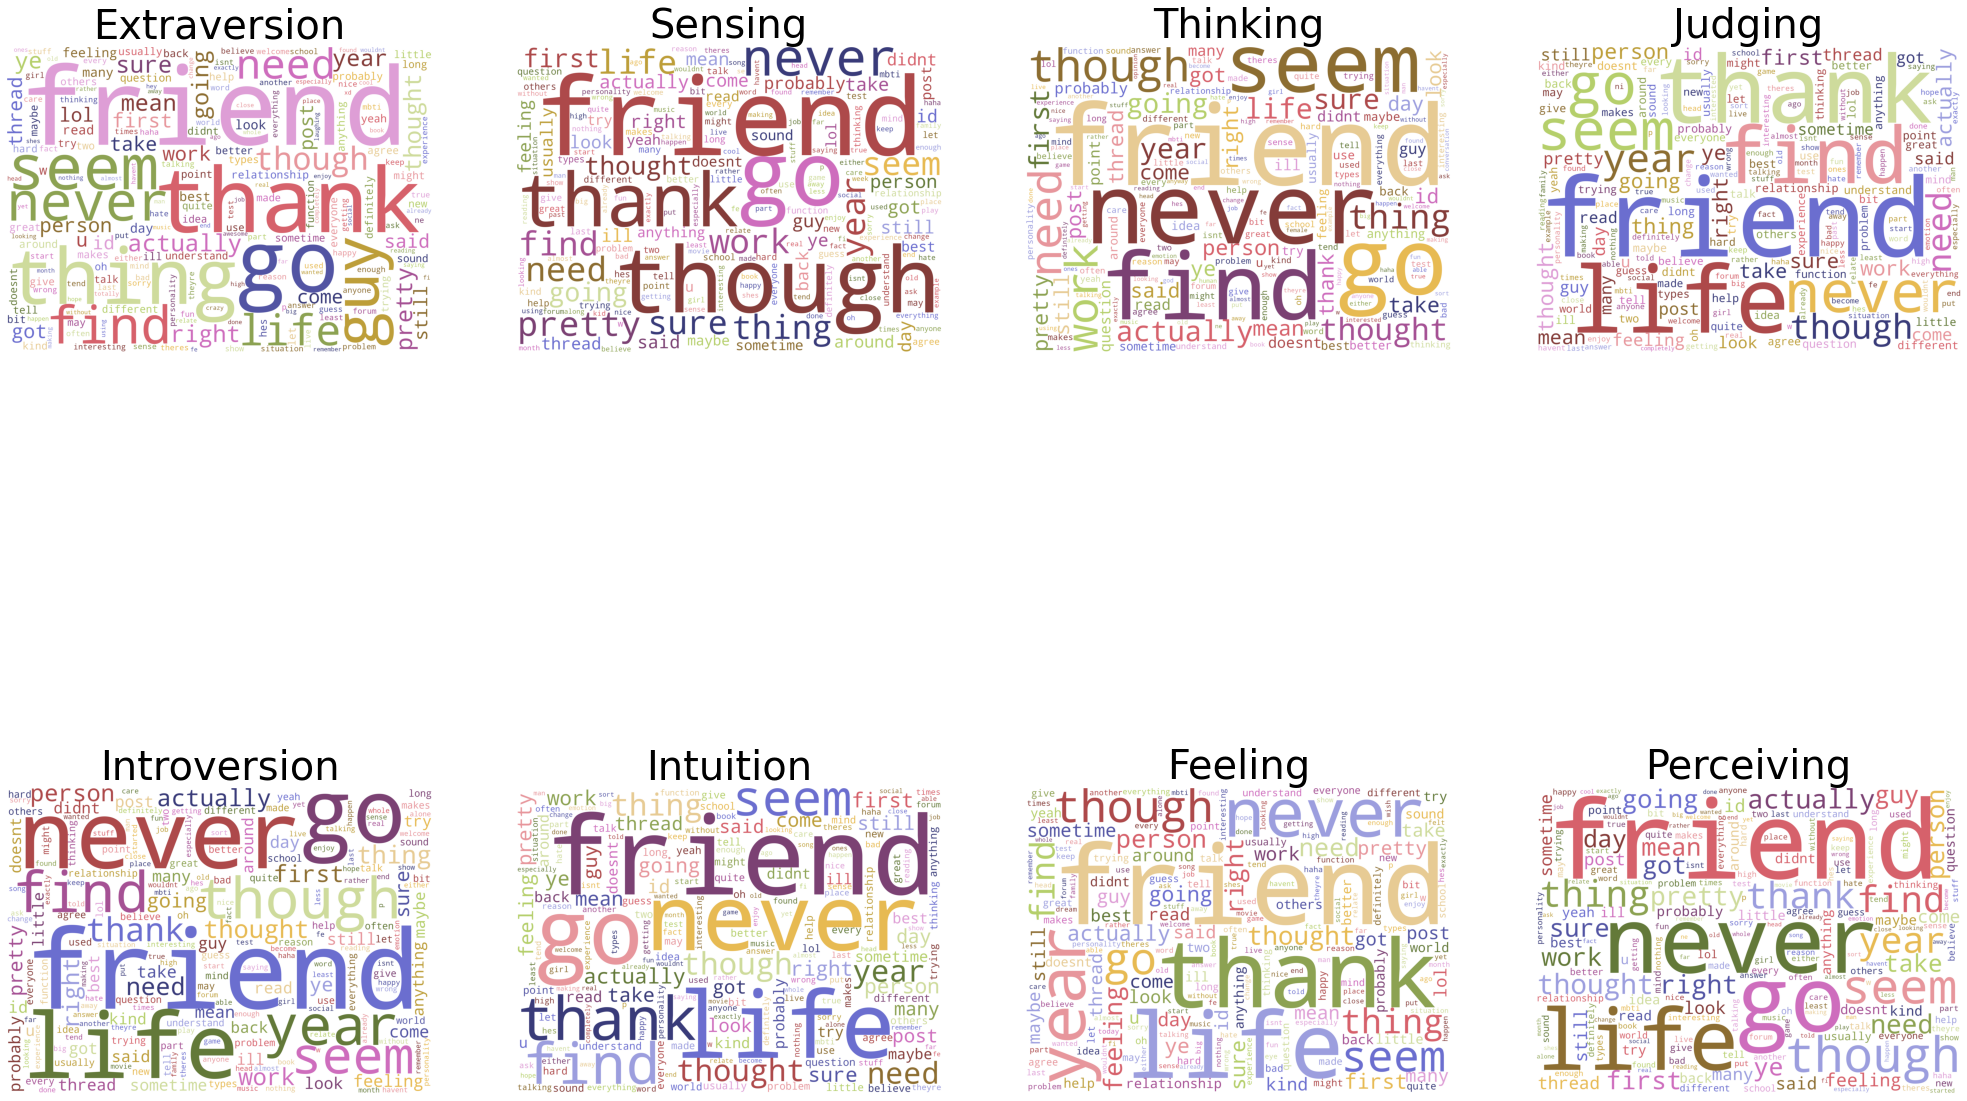

In [39]:
plt.figure(figsize=(35,25))
# Extraversion
subset = df2[df2.Extraversion==1]
text = subset.posts.values
cloud_extro = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 4, 1)
plt.axis('off')
plt.title("Extraversion",fontsize=40)
plt.imshow(cloud_extro)


# Introversion
subset = df2[df2.Extraversion==0]
text = subset.posts.values
cloud_intro = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 4, 5)
plt.axis('off')
plt.title("Introversion",fontsize=40)
plt.imshow(cloud_intro)


# Sensing
subset = df2[df2.Sensing==1]
text = subset.posts.values
cloud_sensing = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 4, 2)
plt.axis('off')
plt.title("Sensing",fontsize=40)
plt.imshow(cloud_sensing)


#Intuition
subset = df2[df2.Sensing==0]
text = subset.posts.values
cloud_int = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 4, 6)
plt.axis('off')
plt.title("Intuition",fontsize=40)
plt.imshow(cloud_int)


# Thinking
subset = df2[df2.Thinking==1]
text = subset.posts.values
cloud_think = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.subplot(2, 4, 3)
plt.axis('off')
plt.title("Thinking",fontsize=40)
plt.imshow(cloud_think)



# Feeling
subset = df2[df2.Thinking==0]
text = subset.posts.values
cloud_feel = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.subplot(2, 4, 7)
plt.axis('off')
plt.title("Feeling",fontsize=40)
plt.imshow(cloud_feel)

# Judging
subset = df2[df2.Judging==1]
text = subset.posts.values
cloud_judge = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.subplot(2, 4, 4)
plt.axis('off')
plt.title("Judging",fontsize=40)
plt.imshow(cloud_judge)



# Perceiving
subset = df2[df2.Judging==0]
text = subset.posts.values
cloud_perc = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          colormap="tab20b",
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.subplot(2, 4, 8)
plt.axis('off')
plt.title("Perceiving",fontsize=40)
plt.imshow(cloud_perc)



plt.show()

* Function for removing stop words and stemming the cleaned text.

After having created the wordclouds, we will apply the function to remove stopwords and apply stemming to the data using the PorterStemmer function. This preparation of the data will be used for the Machine Learning models as well as the MLP ones.

In [40]:
def stopwords_stemming(x):
  ps = PorterStemmer()
  x = word_tokenize(x)
  x = [word for word in x if word not in stop_cus]
  x= [ps.stem(w) for w in x]
  x = ' '.join(x)
  return(x)

In [41]:
data['posts'] = data['posts'].apply(stopwords_stemming)

In [42]:
data.head()

,type,posts,Extraversion,Sensing,Thinking,Judging
0,INFJ,moment sportscent top ten play prank lifechang...,0,0,0,1
1,ENTP,find lack post alarm sex bore posit often exam...,1,0,1,0
2,INTP,cours bless curs absolut posit best friend cou...,0,0,1,0
3,INTJ,dear enjoy convers day esoter gab natur univer...,0,0,1,1
4,ENTJ,fire anoth silli misconcept approach logic go ...,1,0,1,1
